In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('listings.csv.gz')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43068 entries, 0 to 43067
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            43068 non-null  int64  
 1   listing_url                                   43068 non-null  object 
 2   scrape_id                                     43068 non-null  int64  
 3   last_scraped                                  43068 non-null  object 
 4   source                                        43068 non-null  object 
 5   name                                          43068 non-null  object 
 6   description                                   42017 non-null  object 
 7   neighborhood_overview                         16330 non-null  object 
 8   picture_url                                   43068 non-null  object 
 9   host_id                                       43068 non-null 

In [ ]:
del data['calendar_updated']
del data['neighbourhood']
del data['neighborhood_overview']
del data['host_location']
del data['host_about']
del data['host_neighbourhood']
del data['host_name']
del data['listing_url']
del data['scrape_id']
del data['last_scraped']
del data['name']
del data['source']
del data['description']
del data['picture_url']
del data['host_url']
del data['host_thumbnail_url']
del data['host_since']
del data['host_picture_url']
del data['host_listings_count']
del data['host_verifications']
del data['number_of_reviews_l30d']
del data['number_of_reviews_ltm']
del data['number_of_reviews_ly']
del data['has_availability']
del data['availability_30']
del data['availability_60']
del data['availability_90']
del data['calculated_host_listings_count']
del data['calculated_host_listings_count_entire_homes']
del data['calculated_host_listings_count_private_rooms']
del data['calculated_host_listings_count_shared_rooms']
del data['license']
del data['estimated_revenue_l365d']
del data['review_scores_accuracy']
del data['review_scores_cleanliness']
del data['review_scores_checkin']
del data['review_scores_value']
del data['reviews_per_month']
del data['first_review']
del data['last_review']
del data['calendar_last_scraped']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43068 entries, 0 to 43067
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            43068 non-null  int64  
 1   host_id                       43068 non-null  int64  
 2   host_response_time            35890 non-null  object 
 3   host_response_rate            35890 non-null  object 
 4   host_acceptance_rate          39327 non-null  object 
 5   host_is_superhost             41613 non-null  object 
 6   host_total_listings_count     43057 non-null  float64
 7   host_has_profile_pic          43057 non-null  object 
 8   host_identity_verified        43057 non-null  object 
 9   neighbourhood_cleansed        43068 non-null  object 
 10  neighbourhood_group_cleansed  0 non-null      float64
 11  latitude                      43068 non-null  float64
 12  longitude                     43068 non-null  float64
 13  p

In [ ]:
import re

def extract_bathroom_number(text):
    if pd.isna(text):
        return np.nan
    text = str(text).lower()
    match = re.search(r'(\d+\.?\d*)\s*(bath|baths|bathroom|bathrooms)|half-bath', text)
    if match:
        if match.group(0) == 'half-bath':
            return 0.5
        return float(match.group(1))
    return np.nan

data['bathrooms_numeric'] = data['bathrooms_text'].apply(extract_bathroom_number)

data[['bathrooms_text', 'bathrooms_numeric']].head()

,bathrooms_text,bathrooms_numeric
0,1.5 baths,1.5
1,2 baths,2.0
2,1 bath,1.0
3,1 private bath,NaN
4,1 bath,1.0


In [ ]:
data['bathroomsf'] = data['bathrooms_numeric'].fillna(data['bathrooms'])

# Displaying head of the relevant columns to show the result
data[['bathrooms_text', 'bathrooms', 'bathrooms_numeric', 'bathroomsf']].head()

,bathrooms_text,bathrooms,bathrooms_numeric,bathroomsf
0,1.5 baths,1.5,1.5,1.5
1,2 baths,2.0,2.0,2.0
2,1 bath,1.0,1.0,1.0
3,1 private bath,NaN,NaN,NaN
4,1 bath,1.0,1.0,1.0


In [ ]:
del data['bathrooms_text']
del data['bathrooms']
del data['bathrooms_numeric']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43068 entries, 0 to 43067
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            43068 non-null  int64  
 1   host_id                       43068 non-null  int64  
 2   host_response_time            35890 non-null  object 
 3   host_response_rate            35890 non-null  object 
 4   host_acceptance_rate          39327 non-null  object 
 5   host_is_superhost             41613 non-null  object 
 6   host_total_listings_count     43057 non-null  float64
 7   host_has_profile_pic          43057 non-null  object 
 8   host_identity_verified        43057 non-null  object 
 9   neighbourhood_cleansed        43068 non-null  object 
 10  neighbourhood_group_cleansed  0 non-null      float64
 11  latitude                      43068 non-null  float64
 12  longitude                     43068 non-null  float64
 13  p

In [ ]:
data.head(10)

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,maximum_nights_avg_ntm,availability_365,number_of_reviews,availability_eoy,estimated_occupancy_l365d,review_scores_rating,review_scores_communication,review_scores_location,instant_bookable,bathroomsf
0,821198084644106078,84350716,within an hour,95%,97%,f,10.0,t,t,Leblon,...,90.0,82,86,27,240,4.93,4.94,4.99,f,1.5
1,821198370698658112,4347269,within an hour,100%,46%,f,39.0,t,t,Copacabana,...,365.0,364,0,95,0,NaN,NaN,NaN,f,2.0
2,821200521820144734,499903412,NaN,NaN,NaN,f,2.0,f,t,Pavuna,...,365.0,365,0,97,0,NaN,NaN,NaN,t,1.0
3,821213014263313420,449763717,a few days or more,0%,57%,f,2.0,t,t,Leblon,...,1125.0,0,3,0,0,5.00,5.00,5.00,f,NaN
4,821223043903573522,25961210,within an hour,100%,71%,t,1.0,t,t,Barra da Tijuca,...,365.0,234,11,72,60,4.91,5.00,5.00,f,1.0
5,821227099948297881,392769753,within an hour,100%,99%,t,17.0,t,t,Copacabana,...,1125.0,113,89,74,246,4.93,4.99,4.94,t,2.0
6,821240939360008287,498395875,within an hour,100%,90%,t,4.0,t,f,Leblon,...,1125.0,0,68,0,114,4.91,4.99,4.99,f,1.0
7,821242614763878451,46944465,within an hour,100%,100%,f,2.0,t,t,Leme,...,15.0,32,23,17,48,4.78,5.00,5.00,f,1.0
8,821254575358803002,15991909,within an hour,100%,73%,t,6.0,t,f,Copacabana,...,365.0,89,8,89,6,5.00,5.00,4.88,f,1.0
9,821314145791532025,91654021,within a few hours,94%,39%,f,622.0,t,t,Botafogo,...,365.0,90,0,90,0,NaN,NaN,NaN,f,1.0


In [ ]:
del data['id']
del data['host_id']
del data['host_response_time']
del data['host_has_profile_pic']
del data['neighbourhood_cleansed']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43068 entries, 0 to 43067
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_rate            35890 non-null  object 
 1   host_acceptance_rate          39327 non-null  object 
 2   host_is_superhost             41613 non-null  object 
 3   host_total_listings_count     43057 non-null  float64
 4   host_identity_verified        43057 non-null  object 
 5   neighbourhood_group_cleansed  0 non-null      float64
 6   latitude                      43068 non-null  float64
 7   longitude                     43068 non-null  float64
 8   property_type                 43068 non-null  object 
 9   room_type                     43068 non-null  object 
 10  accommodates                  43068 non-null  int64  
 11  bedrooms                      42096 non-null  float64
 12  beds                          38660 non-null  float64
 13  a

In [ ]:
data[['bedrooms','beds','amenities']]

,bedrooms,beds,amenities
0,2.0,3.0,"[""Hangers"", ""Hot water kettle"", ""Wine glasses""..."
1,1.0,1.0,"[""Smoking allowed"", ""TV"", ""Kitchen"", ""Washer"",..."
2,1.0,1.0,"[""BBQ grill"", ""Exterior security cameras on pr..."
3,NaN,NaN,"[""Essentials"", ""Hair dryer"", ""Cooking basics"",..."
4,1.0,1.0,"[""Outdoor shower"", ""Pool"", ""Free parking on pr..."
...,...,...,...
43063,1.0,1.0,"[""Bed linens"", ""Stove"", ""Refrigerator"", ""Crib""..."
43064,1.0,1.0,"[""Exterior security cameras on property"", ""TV""..."
43065,1.0,1.0,"[""Keypad"", ""Hangers"", ""Clothing storage"", ""Min..."
43066,1.0,2.0,"[""Dining table"", ""Bed linens"", ""Outdoor dining..."


In [ ]:
data[['neighbourhood_group_cleansed','property_type','room_type']]

,neighbourhood_group_cleansed,property_type,room_type
0,NaN,Entire condo,Entire home/apt
1,NaN,Entire rental unit,Entire home/apt
2,NaN,Entire rental unit,Entire home/apt
3,NaN,Private room in rental unit,Private room
4,NaN,Entire rental unit,Entire home/apt
...,...,...,...
43063,NaN,Entire rental unit,Entire home/apt
43064,NaN,Private room in home,Private room
43065,NaN,Entire rental unit,Entire home/apt
43066,NaN,Private room in home,Private room


In [ ]:
del data['property_type']
del data['neighbourhood_group_cleansed']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43068 entries, 0 to 43067
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           35890 non-null  object 
 1   host_acceptance_rate         39327 non-null  object 
 2   host_is_superhost            41613 non-null  object 
 3   host_total_listings_count    43057 non-null  float64
 4   host_identity_verified       43057 non-null  object 
 5   latitude                     43068 non-null  float64
 6   longitude                    43068 non-null  float64
 7   room_type                    43068 non-null  object 
 8   accommodates                 43068 non-null  int64  
 9   bedrooms                     42096 non-null  float64
 10  beds                         38660 non-null  float64
 11  amenities                    43068 non-null  object 
 12  price                        38670 non-null  object 
 13  minimum_nights  

In [ ]:
def clean_percentage(col):
    # Remove '%' and convert to float, then to int
    # Handles NaN values by returning NaN
    return col.str.replace('%', '', regex=False).astype(float).astype('Int64')

# Apply the cleaning function to the specified columns
data['host_response_rate'] = clean_percentage(data['host_response_rate'].fillna('0%'))
data['host_acceptance_rate'] = clean_percentage(data['host_acceptance_rate'].fillna('0%'))


# Display the first few rows of the converted columns and their dtypes
print(data[['host_response_rate', 'host_acceptance_rate']].head())
print(data[['host_response_rate', 'host_acceptance_rate']].dtypes)

   host_response_rate  host_acceptance_rate
0                  95                    97
1                 100                    46
2                   0                     0
3                   0                    57
4                 100                    71
host_response_rate      Int64
host_acceptance_rate    Int64
dtype: object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43068 entries, 0 to 43067
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           43068 non-null  Int64  
 1   host_acceptance_rate         43068 non-null  Int64  
 2   host_is_superhost            41613 non-null  object 
 3   host_total_listings_count    43057 non-null  float64
 4   host_identity_verified       43057 non-null  object 
 5   latitude                     43068 non-null  float64
 6   longitude                    43068 non-null  float64
 7   room_type                    43068 non-null  object 
 8   accommodates                 43068 non-null  int64  
 9   bedrooms                     42096 non-null  float64
 10  beds                         38660 non-null  float64
 11  amenities                    43068 non-null  object 
 12  price                        38670 non-null  object 
 13  minimum_nights  

In [ ]:
data['host_is_superhost'] = data['host_is_superhost'].map({'t': 1, 'f': 0})
data['host_identity_verified'] = data['host_identity_verified'].map({'t': 1, 'f': 0})
data['room_type'] = data['room_type'].map({'Entire home/apt': 1, 'Private room': 0})
data['instant_bookable'] = data['instant_bookable'].map({'t': 1, 'f': 0})

In [ ]:
data[['host_is_superhost','host_identity_verified','room_type','instant_bookable']]

,host_is_superhost,host_identity_verified,room_type,instant_bookable
0,0.0,1.0,1.0,0
1,0.0,1.0,1.0,0
2,0.0,1.0,1.0,1
3,0.0,1.0,0.0,0
4,1.0,1.0,1.0,0
...,...,...,...,...
43063,NaN,1.0,1.0,1
43064,0.0,1.0,0.0,0
43065,1.0,1.0,1.0,0
43066,0.0,0.0,0.0,1


In [ ]:
data['price'] = data['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
print(data['price'].head())

0     580.0
1    1900.0
2     700.0
3       NaN
4     500.0
Name: price, dtype: float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43068 entries, 0 to 43067
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           43068 non-null  Int64  
 1   host_acceptance_rate         43068 non-null  Int64  
 2   host_is_superhost            41613 non-null  float64
 3   host_total_listings_count    43057 non-null  float64
 4   host_identity_verified       43057 non-null  float64
 5   latitude                     43068 non-null  float64
 6   longitude                    43068 non-null  float64
 7   room_type                    42619 non-null  float64
 8   accommodates                 43068 non-null  int64  
 9   bedrooms                     42096 non-null  float64
 10  beds                         38660 non-null  float64
 11  amenities                    43068 non-null  object 
 12  price                        38670 non-null  float64
 13  minimum_nights  

In [ ]:
data.isnull().sum()

,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,1455
host_total_listings_count,11
host_identity_verified,11
latitude,0
longitude,0
room_type,449
accommodates,0
bedrooms,972


In [ ]:
data.dropna(subset=['price'], inplace=True)

In [ ]:
data.isnull().sum()

,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,1287
host_total_listings_count,11
host_identity_verified,11
latitude,0
longitude,0
room_type,410
accommodates,0
bedrooms,74


In [ ]:
del data ['minimum_nights_avg_ntm']
del data ['minimum_maximum_nights']
del data ['maximum_maximum_nights']
del data ['minimum_minimum_nights']
del data ['number_of_reviews']

In [ ]:
drop_duplicates = data.drop_duplicates()

In [ ]:
Airbnblist_merge_colums = ['accommodates','bathrooms','bedrooms','beds']

In [ ]:
def AmenitiesCount(amenities):
    return (amenities.count(',')+1)

def HasTV(amenities):
    if 'tv' in amenities.lower():
        return 1
    else:
        return 0

def HasWifi(amenities):
    if 'wifi' in amenities.lower():
        return 1
    else:
        return 0

def HasKitchen(amenities):
    if 'kitchen' in amenities.lower():
        return 1
    else:
        return 0

def HasAirConditioning(amenities):
    if 'air conditioning' in amenities.lower():
        return 1
    else:
        return 0

def HasHeating(amenities):
    if 'heating' in amenities.lower():
        return 1
    else:
        return 0

def HasWifi(amenities):
    if 'wifi' in amenities.lower():
        return 1
    else:
        return 0

def HasPool(amenities):
    if 'pool' in amenities.lower():
        return 1
    else:
        return 0

def HasGym(amenities):
    if 'gym' in amenities.lower():
        return 1
    else:
        return 0

def HasPetsAllowed(amenities):
    if 'pets allowed' in amenities.lower():
        return 1
    else:
        return 0

def HasBreakfast(amenities):
    if 'breakfast' in amenities.lower():
        return 1
    else:
        return 0

def HasSmokingAllowed(amenities):
    if 'smoking allowed' in amenities.lower():
        return 1
    else:
        return 0

def HasHeating(amenities):
    if 'heating' in amenities.lower():
        return 1
    else:
        return 0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38670 entries, 0 to 43067
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           38670 non-null  Int64  
 1   host_acceptance_rate         38670 non-null  Int64  
 2   host_is_superhost            37383 non-null  float64
 3   host_total_listings_count    38659 non-null  float64
 4   host_identity_verified       38659 non-null  float64
 5   latitude                     38670 non-null  float64
 6   longitude                    38670 non-null  float64
 7   room_type                    38260 non-null  float64
 8   accommodates                 38670 non-null  int64  
 9   bedrooms                     38596 non-null  float64
 10  beds                         38656 non-null  float64
 11  amenities                    38670 non-null  object 
 12  price                        38670 non-null  float64
 13  minimum_nights       

In [ ]:
data.isnull().sum()

,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,1287
host_total_listings_count,11
host_identity_verified,11
latitude,0
longitude,0
room_type,410
accommodates,0
bedrooms,74


usamos dropna para eliminar bathroomsf,maximum_minimun_nights,beds,bedrooms,roomtype,hostissuperhost,host-total-listings y host identity verified porque juntos no llegan a el 5% de la data


In [ ]:
data.dropna(subset=['bathroomsf'], inplace=True)
data.dropna(subset=['maximum_minimum_nights'], inplace=True)
data.dropna(subset=['beds'], inplace=True)
data.dropna(subset=['bedrooms'], inplace=True)
data.dropna(subset=['room_type'], inplace=True)
data.dropna(subset=['host_is_superhost'], inplace=True)
data.dropna(subset=['host_total_listings_count'], inplace=True)
data.dropna(subset=['host_identity_verified'], inplace=True)

In [ ]:
data.isnull().sum()

,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,0
host_total_listings_count,0
host_identity_verified,0
latitude,0
longitude,0
room_type,0
accommodates,0
bedrooms,0


In [ ]:
data['review_scores_rating'] = data['review_scores_rating'].fillna(0)

In [ ]:
data['review_scores_location'] = data['review_scores_location'].fillna(0)
data['review_scores_communication'] = data['review_scores_communication'].fillna(0)

In [ ]:
data.isnull().sum()

,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,0
host_total_listings_count,0
host_identity_verified,0
latitude,0
longitude,0
room_type,0
accommodates,0
bedrooms,0


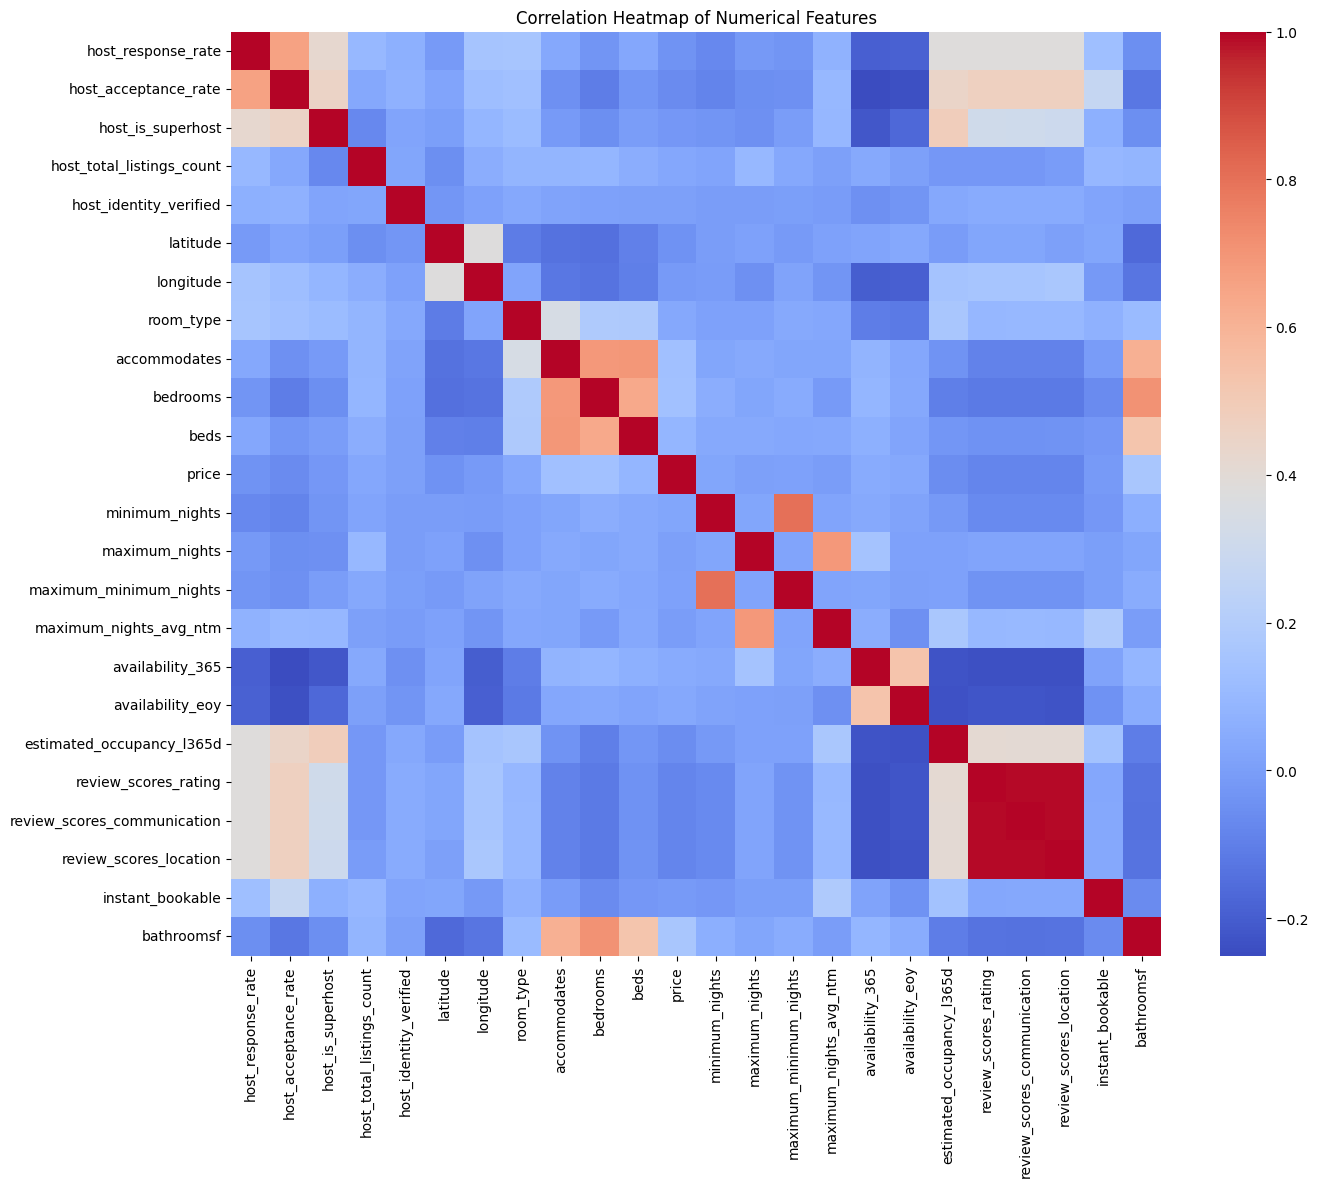

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = data.select_dtypes(include=['number']).columns
corr = data[numeric_cols].corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<Axes: ylabel='price'>

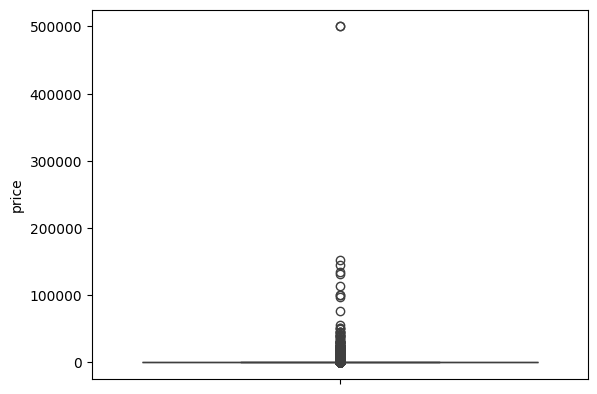

In [ ]:
sns.boxplot(data=data,y='price')

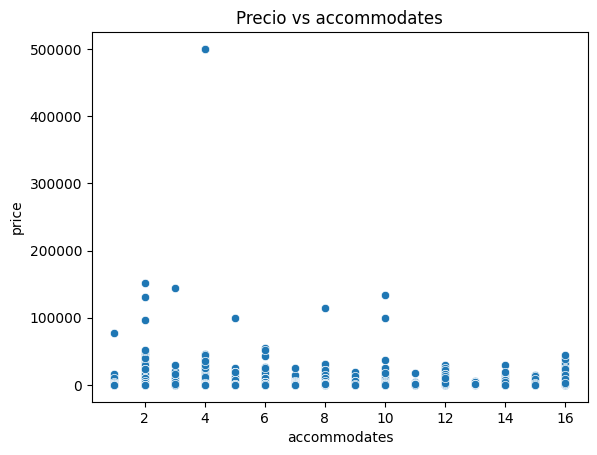

In [ ]:
sns.scatterplot(data=data, x='accommodates', y='price')
plt.title('Precio vs accommodates')
plt.show()